In [63]:
import pandas as pd
import numpy as np

In [64]:
data = pd.read_csv("data/heart (1).csv")

In [65]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


- age: Hastanın yaşı
- sex: Hastanın cinsiyeti (0: Kadın, 1: Erkek)
- cp: Göğüs ağrısı tipi (0: Tipik Angina, 1: Atipik Angina, 2: Non-anginal Ağrı, 3: Asimptomatik)
- trtbps: Dinlenme halindeki kan basıncı (mm Hg cinsinden)
- chol: Kolestrol düzeyi (mg/dl, BMI sensörü aracılığıyla alınmış)
- fbs: (Açlık kan şekeri > 120 mg/dl) (1: Doğru, 0: Yanlış)
- restecg: Dinlenme elektrokardiyografik sonuçlar (0: Normal, 1: ST-T dalgası normalitesi, 2: Sol ventriküler hipertrofi)
- thalachh: Stres testi sırasında elde edilen maksimum kalp atış hızı
- oldpeak: Dinlenmeye göre egzersizin neden olduğu ST depresyonu
- slp: En yüksek egzersiz ST segmentinin eğimi (0: Eğimli, 1: Düz, 2: Aşağı eğimli)
- caa: Büyük damar sayısı
- thall: Talium Stres Testi sonucu (0 ile 3 arasında)
- exng: Egzersize bağlı anjina (1: Evet, 0: Hayır)
- output: Hedef değişken (1: Kalp hastalığı var, 0: Kalp hastalığı yok)


In [66]:
# Son 5 veri
data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [67]:
def check_df(dataframe, head = 5):
    print("######################################  Shape  ##################################")
    print(dataframe.shape)
    #print("######################################  Types  ##################################")
    #print(dataframe.dtypes)
    # Sadece oldpeak float
    print("#######################################  NA  ####################################")
    print(dataframe.isnull().sum())

In [68]:
check_df(data)

######################################  Shape  ##################################
(303, 14)
#######################################  NA  ####################################
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [69]:
print(data.duplicated().sum())
data.drop_duplicates()

1


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [84]:
num_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

features_convrt = [feature for feature in data.columns if feature not in num_features]

data[features_convrt] = data[features_convrt].astype('object')

data.dtypes

age           int64
sex          object
cp           object
trtbps        int64
chol          int64
fbs          object
restecg      object
thalachh      int64
exng         object
oldpeak     float64
slp          object
caa          object
thall        object
output       object
dtype: object

In [85]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


* age: Hastaların yaş ortalaması yaklaşık 54,4, en genci 29 ve en yaşlısı 77 yaşındadır.
* trtbps: İstirahat kan basıncı ortalama 131,62 mm Hg'dir ve 94 ile 200 mm Hg arasındadır.
* chol: Ortalama kolesterol seviyesi yaklaşık 246,26 mg/dl'dir, ancak en düşük seviyesi 126 mg/dl ve en yüksek seviyesi 564 mg/dl'dir.
* thalachh: 71 ile 202 arasındadır ve ortalama maksimum kalp atış hızı 149,65'tir.
* oldpeak: Egzersiz, dinlenmeye kıyasla egzersizin neden olduğu ortalama ST depresyonu 1,04'tür ve değerleri 0 ila 6,2 arasındadır.

In [86]:
#Kategorik değişkenler için özet
data.describe(include='object')

,sex,cp,fbs,restecg,exng,slp,caa,thall,output
count,303,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,2,0,2,1
freq,207,143,258,152,204,142,175,166,165


* sex: 303 satırdan 207 hastadan erkek(1)
* cp: Göğüs ağrısı tiplerinden en çok tipik anginadır (0: Tipik Angina, 1: Atipik Angina, 2: Non-anginal Ağrı, 3: Asimptomatik)
* fbs: Açlık kan şekeri değeri 120 den küçük olan hasta sayısı 252'dir.
* restecg: Dinlenme elektrokardiyografik sonuçlar için en yaygın sonuç 152 kez görünen "1"dir. (0: Normal, 1: ST-T dalgası normalitesi, 2: Sol ventriküler hipertrofi)
* exng: En sık görülen değer, 204 kez gözlemlenen "0"dır (egzersiz kaynaklı anjin olmadığını gösterir).
* slp: En sık rastlanan eğim türü ise 142 kez meydana gelen "2"dir. (0: Eğimli, 1: Düz, 2: Aşağı eğimli)
* caa:  Büyük damarların sayısı için beş benzersiz değer vardır; "0" en sık görülenidir ve 175 kez tekrarlanır.
* thall: En yaygın tip 166 kez gözlemlenen "2 "dir.
* output: Kalp hastalığı olan 165 kişi vardır.

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
cat_features = data.columns.difference(num_features)
df_categorical = data[cat_features]

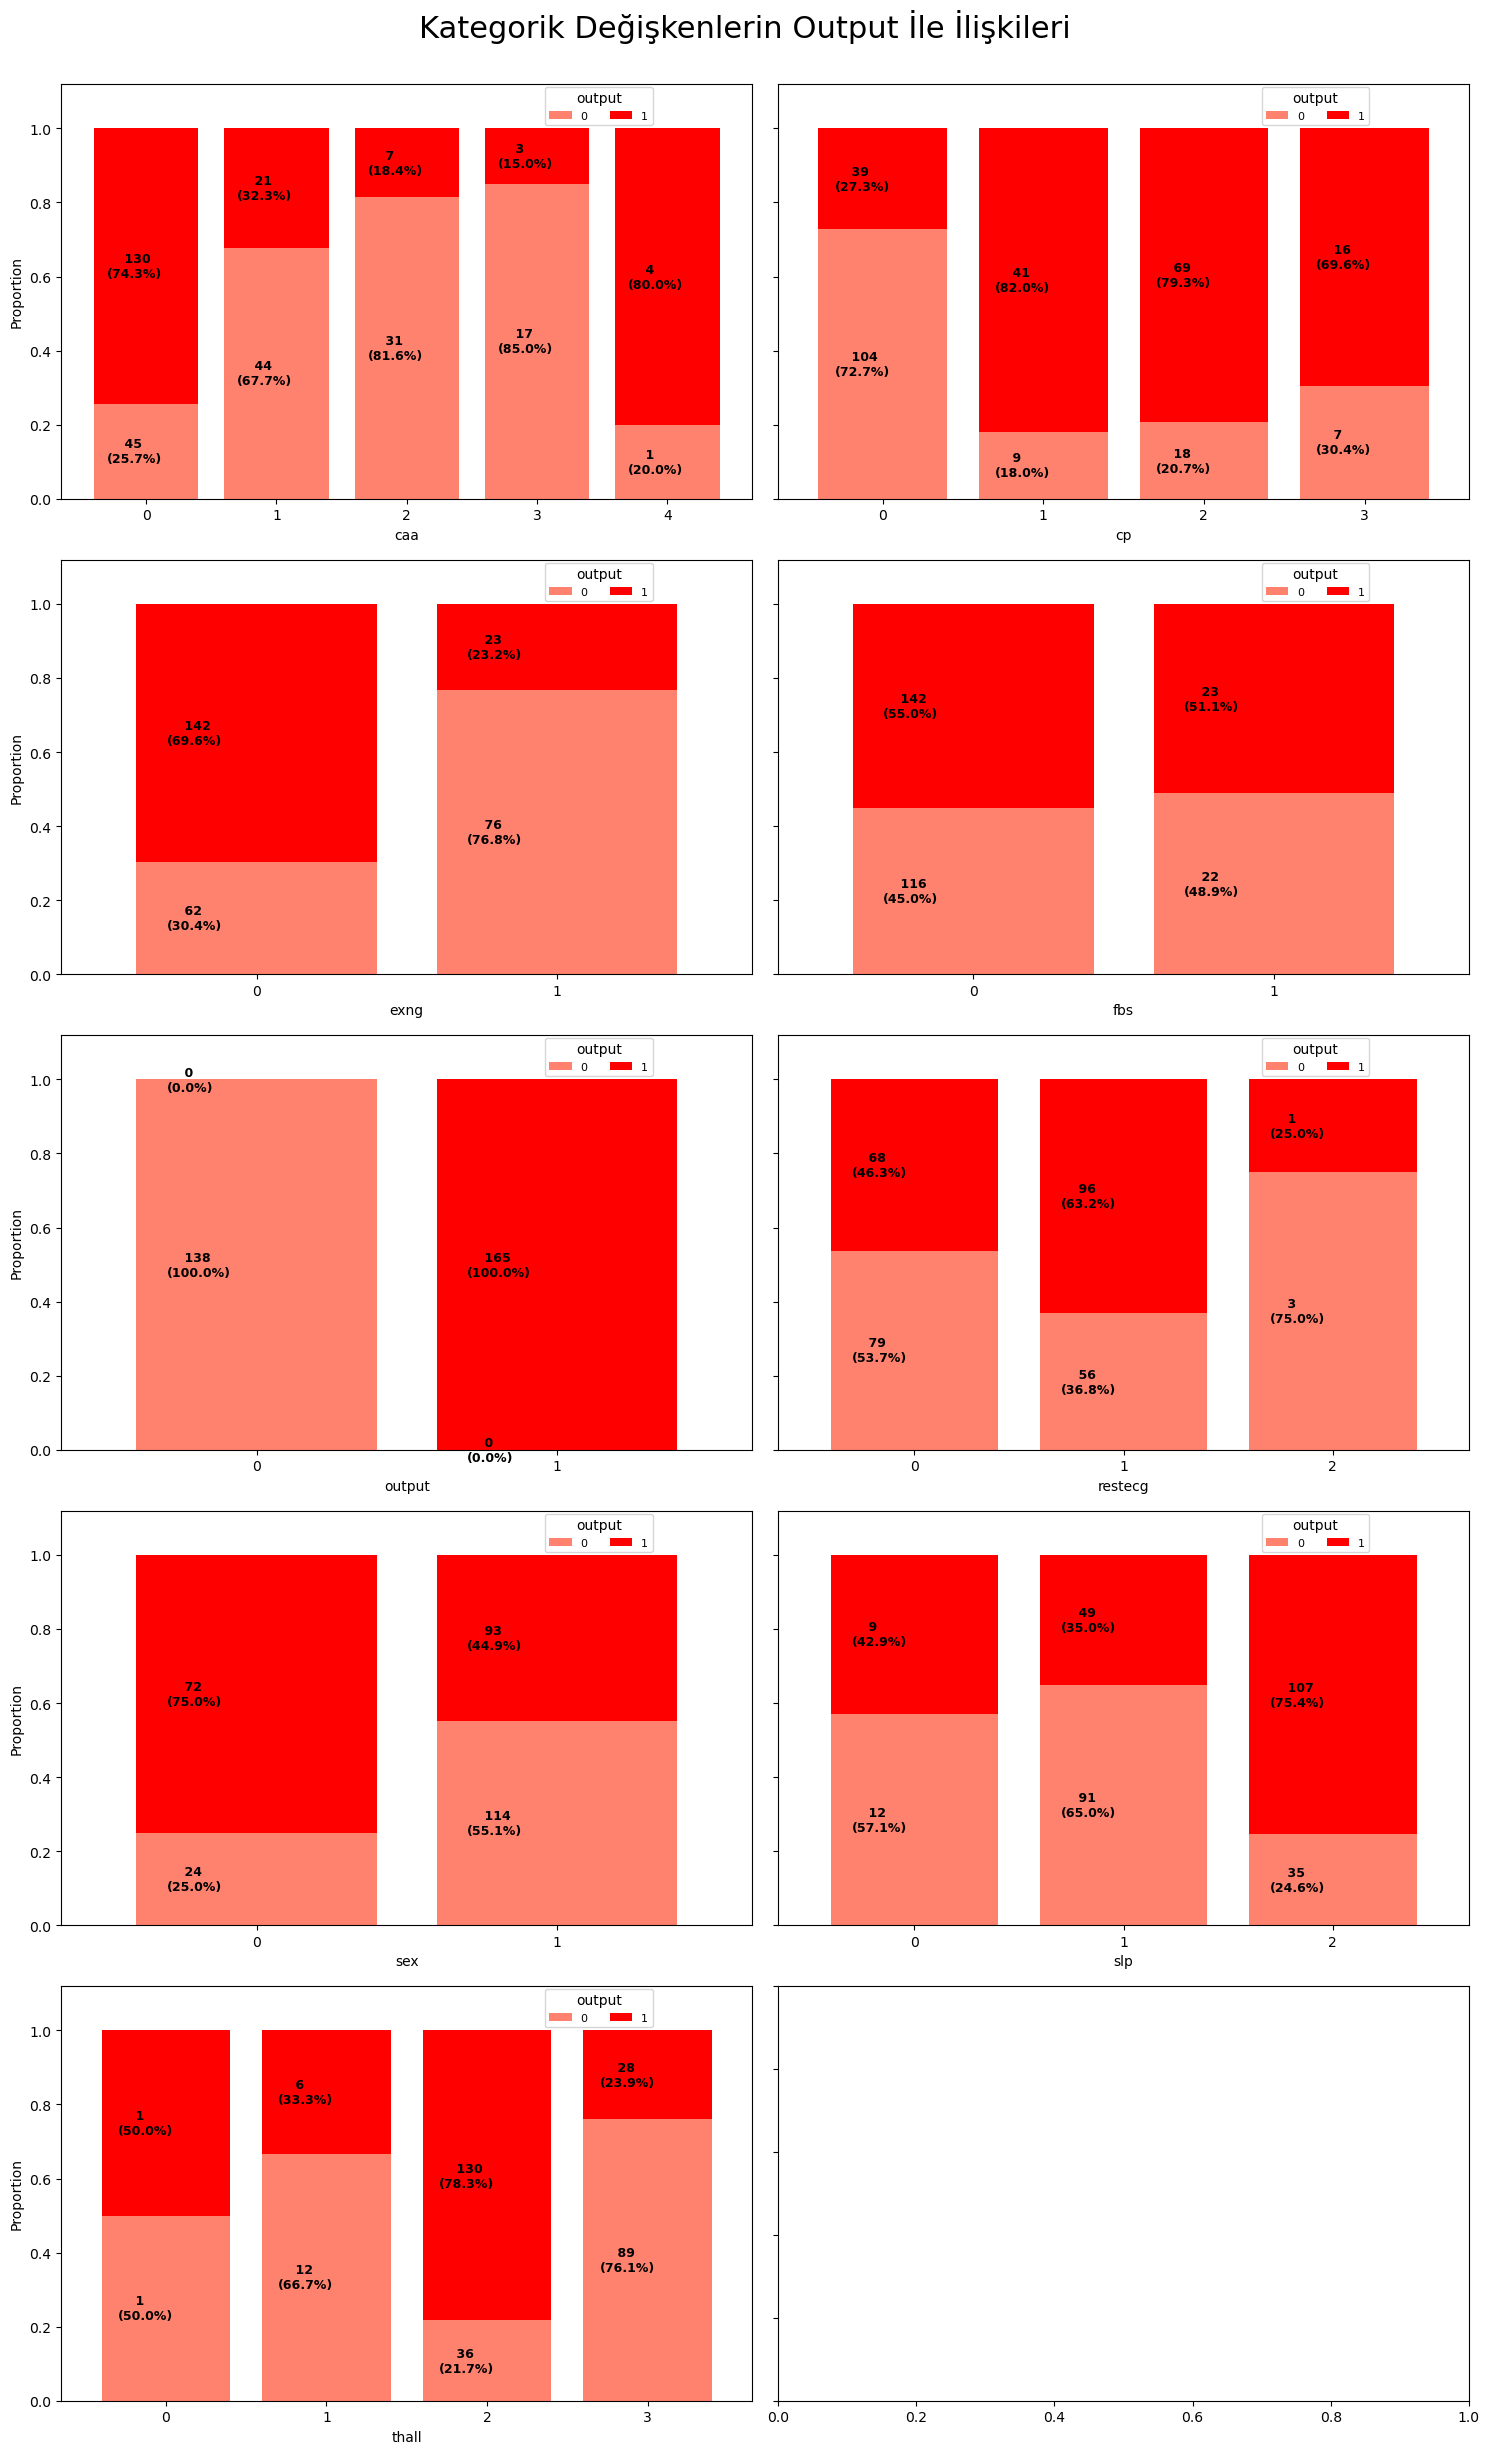

In [89]:
# Kategorik değişkenlerin sayısına göre satır ve sütun oluşumu
len_cat_ftrs = len(cat_features)
num_rows = int(np.ceil(len_cat_ftrs / 2))
num_cols = min(len_cat_ftrs, 2)

# subplots oluştur
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

# tek boyutlu dizi haline getirelim
axes = axes.flatten()

for i, col in enumerate(cat_features):
    # Kategorik değişkenler için output ile ilişki oluşturma
    cross_tab = pd.crosstab(index=data[col], columns=data['output'])
    cross_tab_prop = pd.crosstab(index=data[col], columns=data['output'], normalize='index') # indexleme 

    cmp = sns.set_palette(['#ff826e', 'red'])
    
    ax = axes[i]
    cross_tab_prop.plot(kind='bar', ax=ax, stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)
    
    # Çubukların ver değerlerin döngüsü
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val], cross_tab.loc[val], cross_tab_prop.loc[val].cumsum()):
            ax.text(x=idx-0.3, y=(y_location-proportion)+(proportion/2)-0.03,
                    s=f'    {count}\n({np.round(proportion * 100, 1)}%)',
                    color="black", fontsize=9, fontweight="bold")

    ax.legend(title='output', loc=(0.7, 0.9), fontsize=8, ncol=2)
    
    ax.set_ylim([0, 1.12])
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.95)

plt.suptitle('Kategorik Değişkenlerin Output İle İlişkileri', fontsize=22)
plt.show()


In [90]:
num_features

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

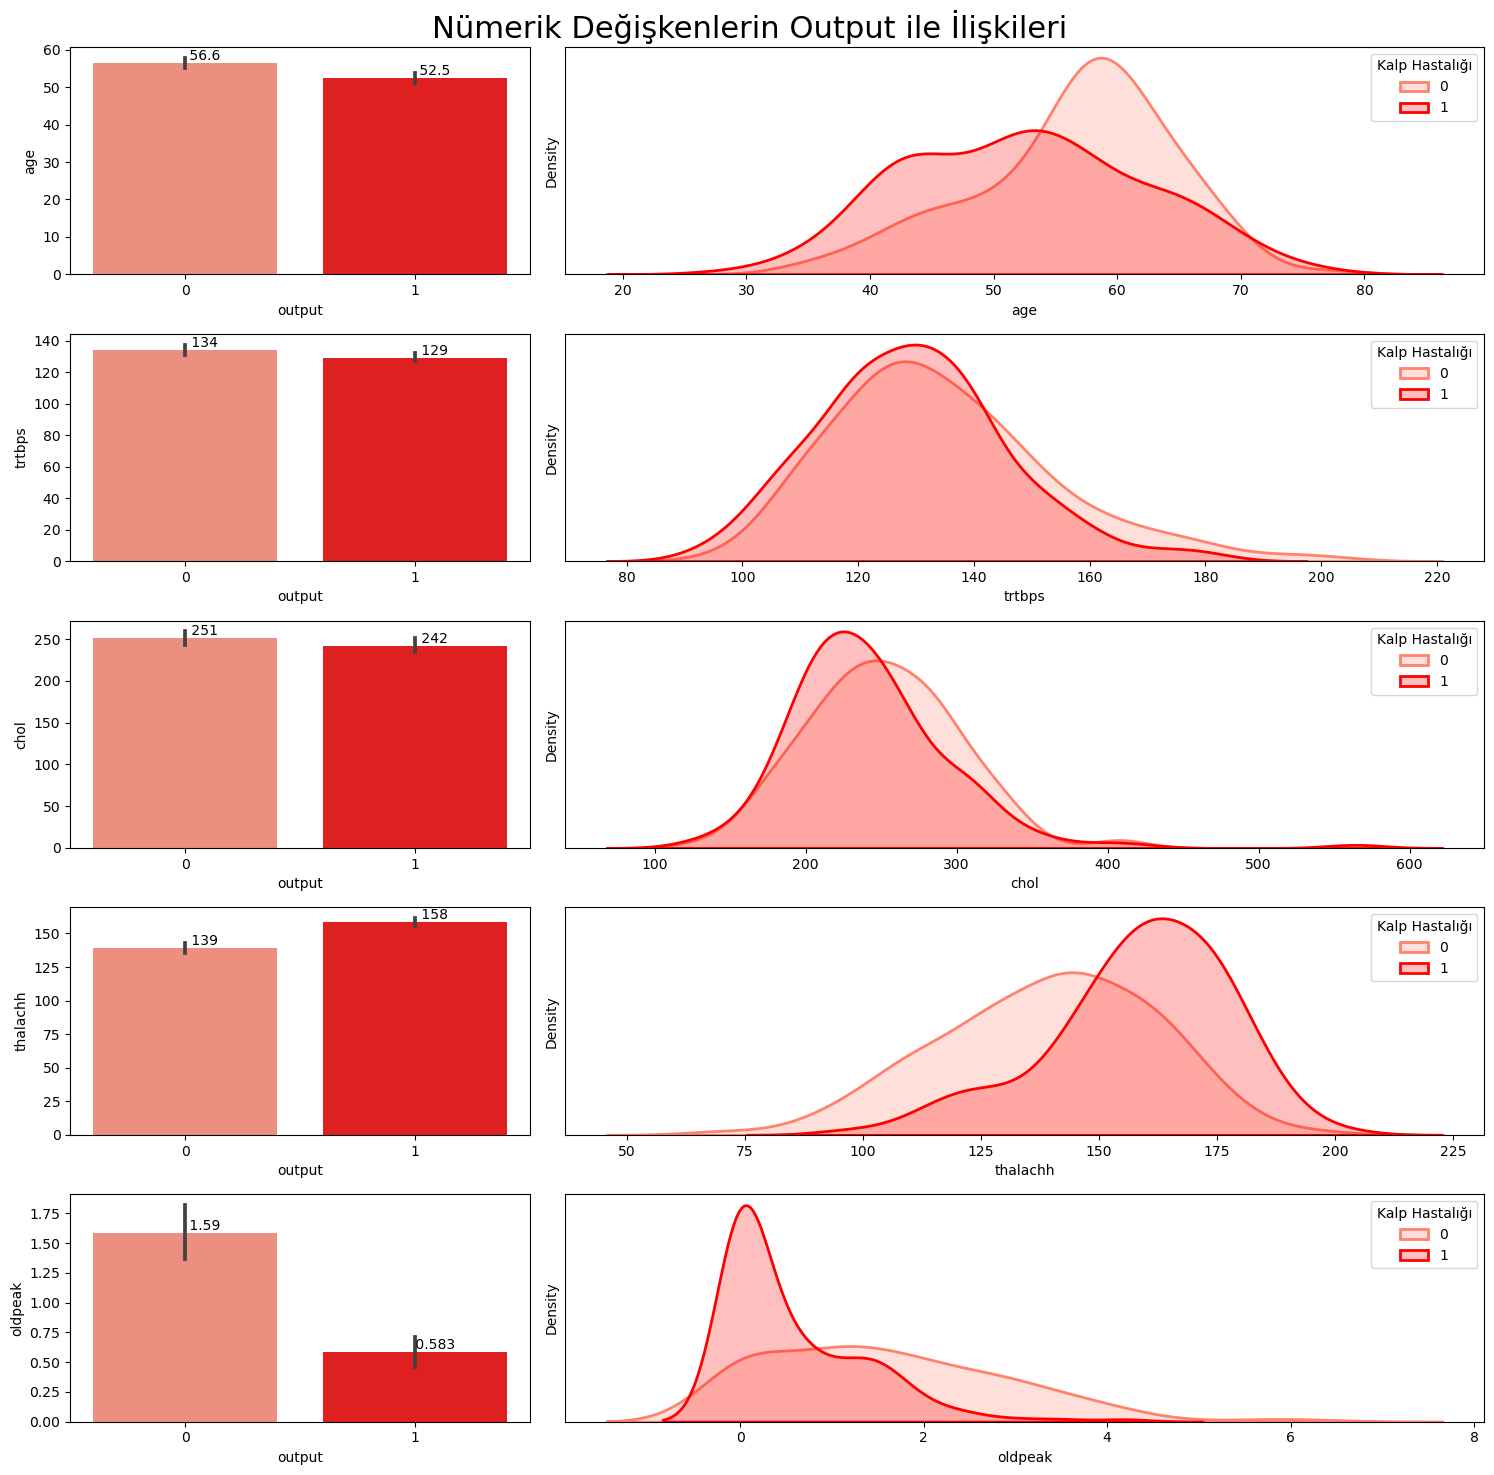

In [92]:
sns.set_palette(['#ff826e', 'red'])

fig, ax = plt.subplots(len(num_features), 2, figsize=(15,15), gridspec_kw={'width_ratios': [1, 2]})

for i, col in enumerate(num_features):
    graph = sns.barplot(data=data, x="output", y=col, ax=ax[i,0])
    
    # KDE plot ile değişkenler arasındaki yoğunluk grafikleri
    sns.kdeplot(data=data[data["output"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=data[data["output"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Kalp Hastalığı', loc='upper right')
    
    # barplotların ortalama değerleri
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')
        
plt.suptitle('Nümerik Değişkenlerin Output ile İlişkileri', fontsize=22)
plt.tight_layout()                     
plt.show()

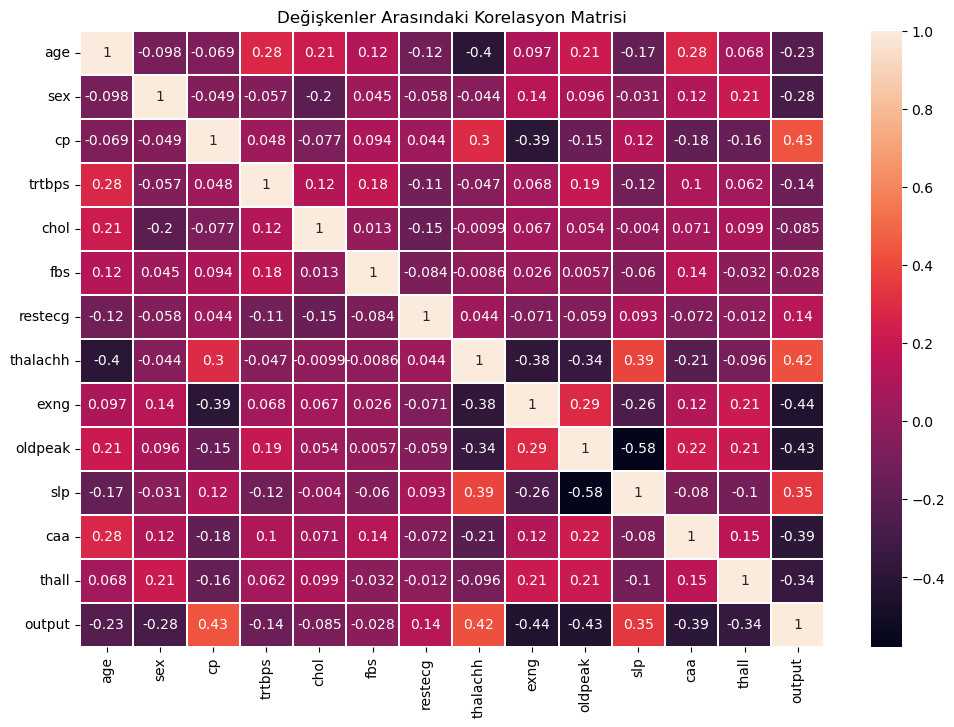

In [122]:
correlation_matrix = data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,linewidth=.01,annot=True,cmap=sns.set_palette(['#ff826e', 'red']))
plt.title("Değişkenler Arasındaki Korelasyon Matrisi")
plt.show()

Output ile -0.20 üzeri olan 9 değişkeni ele alalım;
* age
* sex
* cp
* trtbps
* chol
* fbs
* restecg
* thalach
* slp

In [94]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [95]:
selected_colomns = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh','slp', 'thall', 'output']
df = data[selected_colomns].copy()
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,slp,thall,output
0,63,1,3,145,233,1,0,150,0,1,1
1,37,1,2,130,250,0,1,187,0,2,1
2,41,0,1,130,204,0,0,172,2,2,1
3,56,1,1,120,236,0,1,178,2,2,1
4,57,0,0,120,354,0,1,163,2,2,1


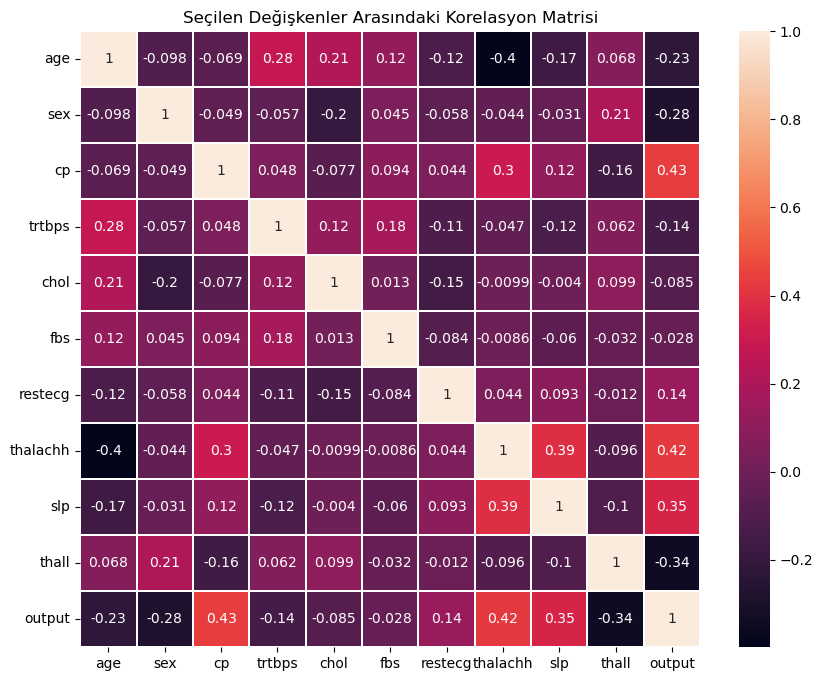

In [120]:
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,linewidth=.01,annot=True,cmap=sns.set_palette(['#ff826e', 'red']))
plt.title("Seçilen Değişkenler Arasındaki Korelasyon Matrisi")
plt.show()

<Axes: xlabel='age', ylabel='cp'>

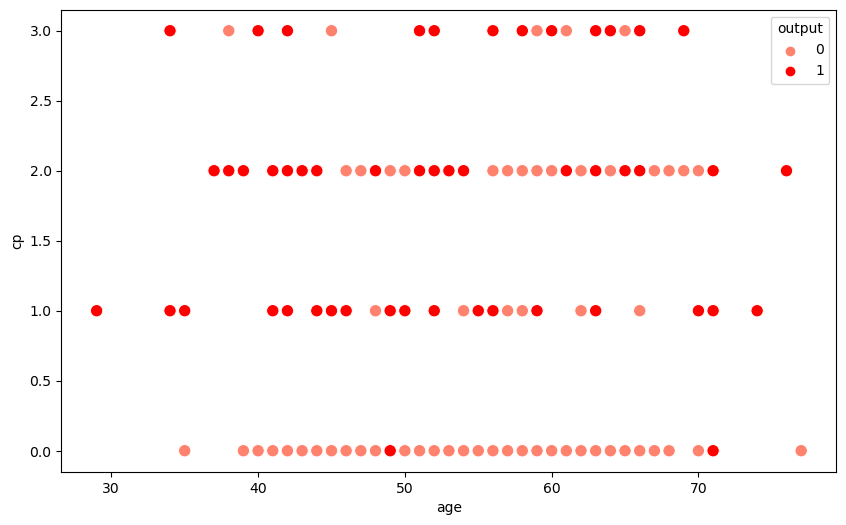

In [119]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='cp', hue='output', data=df, palette=sns.set_palette(['#ff826e', 'red']), s=80)

<Axes: xlabel='age', ylabel='thalachh'>

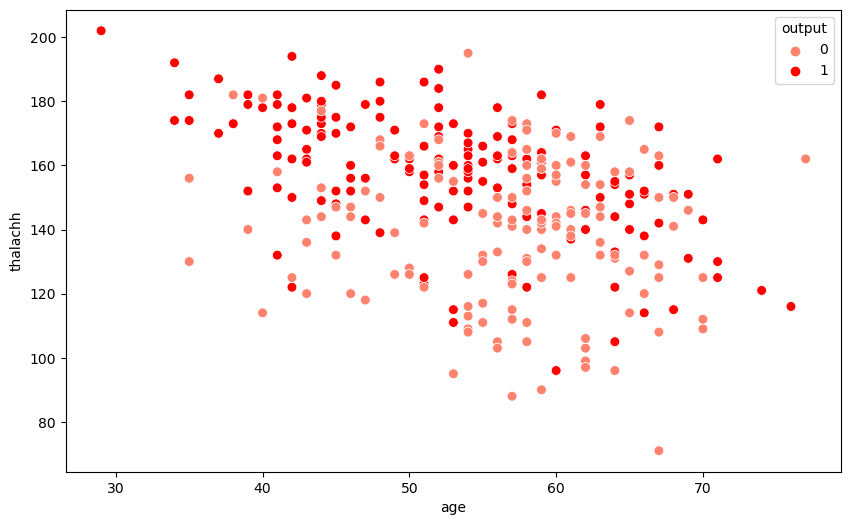

In [117]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='thalachh', hue='output', data=df, palette=sns.set_palette(['#ff826e', 'red']), s=50)

<Axes: xlabel='thalachh', ylabel='chol'>

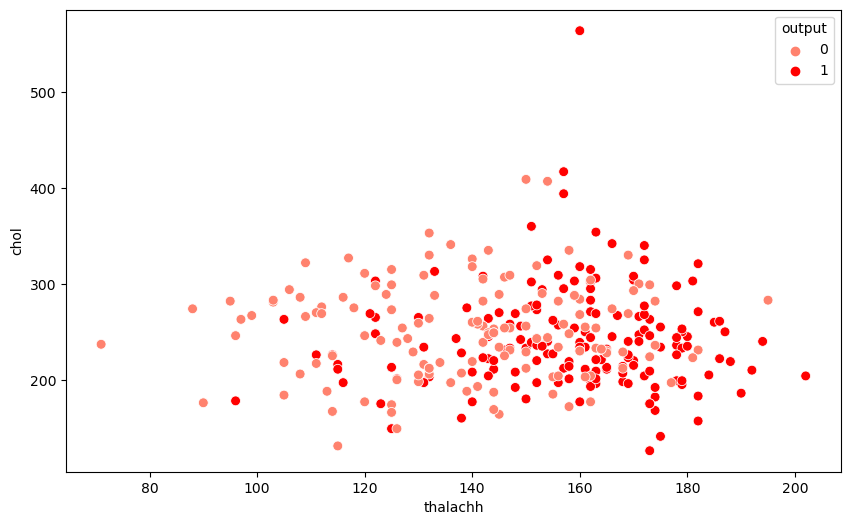

In [113]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='thalachh', y='chol', hue='output', data=df, palette=sns.set_palette(['#ff826e', 'red']), s=50)

<Axes: xlabel='age', ylabel='chol'>

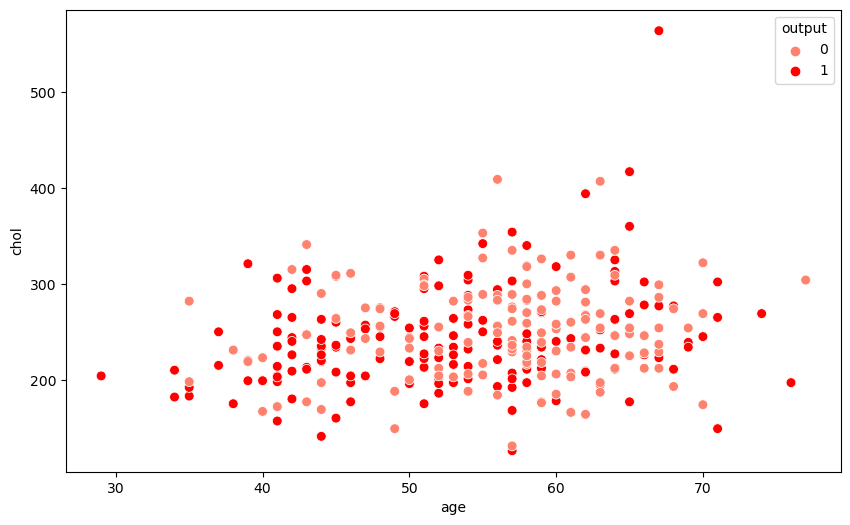

In [114]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='chol', hue='output', data=df, palette=sns.set_palette(['#ff826e', 'red']), s=50)

<Axes: xlabel='age', ylabel='trtbps'>

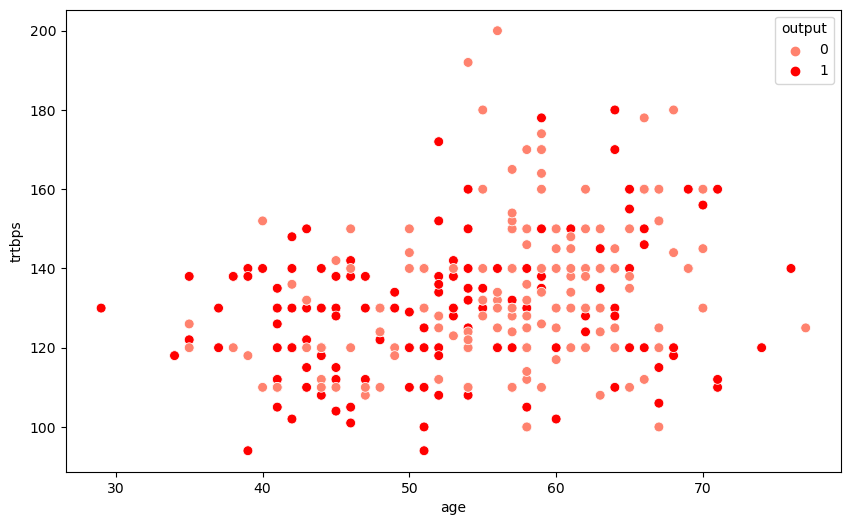

In [115]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='trtbps', hue='output', data=data, palette=sns.set_palette(['#ff826e', 'red']), s=50)

In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [99]:
df = df.astype("int64")
df.dtypes

age         int64
sex         int64
cp          int64
trtbps      int64
chol        int64
fbs         int64
restecg     int64
thalachh    int64
slp         int64
thall       int64
output      int64
dtype: object

In [100]:
features = df[["age", "sex", "cp", "trtbps", "chol", "fbs", "restecg", "thalachh", "slp"]]
target = df[['output']]

In [101]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

- Standartscaler dışında robustscaler(araştır) ve min-max normalizasyonu için de denenebilir. 

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_df, target, test_size=0.2, random_state=42)
y_train=y_train.values.ravel()


In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score

knn_model = KNeighborsClassifier(n_neighbors=4) 
knn_model.fit(X_train, y_train)

# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)



SVC()

In [104]:
#KNN
y_pred = knn_model.predict(X_test)

print("F1_Score:", f1_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

F1_Score: 0.75
Accuracy: 0.7704918032786885

Confusion Matrix:
 [[26  3]
 [11 21]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.90      0.79        29
           1       0.88      0.66      0.75        32

    accuracy                           0.77        61
   macro avg       0.79      0.78      0.77        61
weighted avg       0.79      0.77      0.77        61



In [105]:
#Logistic regression
logreg_pred = logreg_model.predict(X_test)

print("F1_Score:", f1_score(y_test, logreg_pred))
print("Accuracy:", accuracy_score(y_test, logreg_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, logreg_pred))
print("\nClassification Report:\n", classification_report(y_test, logreg_pred))

F1_Score: 0.8275862068965517
Accuracy: 0.8360655737704918

Confusion Matrix:
 [[27  2]
 [ 8 24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.93      0.84        29
           1       0.92      0.75      0.83        32

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61



In [106]:
# Decision Tree
dt_pred = dt_model.predict(X_test)

print("F1_Score:", f1_score(y_test, dt_pred))
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, dt_pred))
print("\nClassification Report:\n", classification_report(y_test, dt_pred))

F1_Score: 0.8253968253968254
Accuracy: 0.819672131147541

Confusion Matrix:
 [[24  5]
 [ 6 26]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [107]:
# Support Vector Machine (SVM)
svm_pred = svm_model.predict(X_test)

print("F1_Score:", f1_score(y_test, svm_pred))
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, svm_pred))
print("\nClassification Report:\n", classification_report(y_test, svm_pred))

F1_Score: 0.8135593220338982
Accuracy: 0.819672131147541

Confusion Matrix:
 [[26  3]
 [ 8 24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



In [108]:
# Random Forest
rf_pred = rf_model.predict(X_test)

print("F1_Score:", f1_score(y_test, rf_pred ))
print("Accuracy:", accuracy_score(y_test, rf_pred ))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pred ))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

F1_Score: 0.847457627118644
Accuracy: 0.8524590163934426

Confusion Matrix:
 [[27  2]
 [ 7 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



In [32]:
import joblib

#joblib.dump(rf_model, 'heart_health_model.joblib')

['heart_health_model.joblib']